<a href="https://colab.research.google.com/github/mjgalaz/Delayed-flights-RelativeRisk-PredictiveModels/blob/main/Delayed_flights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo Manual: Riesgo relativo / Score. **Modelo a comparar/mejorar**

 Definición de variable NUEVOS RETRASADOS cortando con Pareto (20% superior de Score definido como Potencial vuelo retrasado).



Accuracy: 0.7121
Precision: 0.2719
Recall: 0.2764
F1 Score: 0.2741


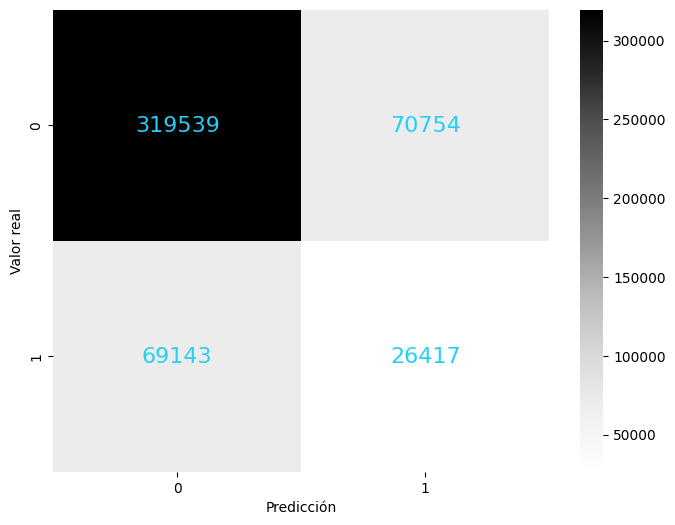

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import auth
from google.cloud import bigquery

# Autenticación
auth.authenticate_user()
# BigQuery
project_id = 'proyecto-no4-datalab-411515'
client = bigquery.Client(project=project_id)
# Query SQL
query = """
SELECT *
FROM proyecto-no4-datalab-411515.dataset_p4.master_clean
"""
# Ejecutar la consulta en BigQuery y obtener los resultados
query_job = client.query(query)
master_clean = query_job.to_dataframe()
# 'RETRASADOS' es la  etiqueta real
y_real = master_clean['RETRASADOS']
# Supongamos que 'dummy_score' es tu etiqueta predicha
y_pred = master_clean['NUEVOS_RETRASADOS']
# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_real, y_pred)
# Calcular métricas
accuracy = accuracy_score(y_real, y_pred)
precision = precision_score(y_real, y_pred)
recall = recall_score(y_real, y_pred)
f1 = f1_score(y_real, y_pred)
# Mostrar métricas
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Encontrar el máximo y mínimo de la matriz
max_value = conf_matrix.max()
min_value = conf_matrix.min()

# Escala de colores
cmap = sns.color_palette("Greys", as_cmap=True)

# Visualizar la matriz de confusión como un mapa de calor con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap, annot_kws={"size": 16, "color": '#25D0F6'}, vmax=max_value, vmin=min_value)
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.show()


# Regresión logística con OneHotEncoder - Modelo sin balance de clases

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.8061
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


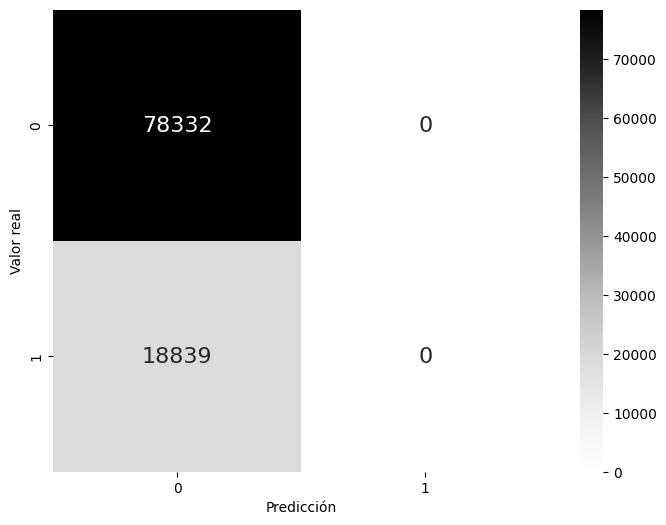

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import auth
from google.cloud import bigquery

# Autenticación
auth.authenticate_user()
# BigQuery
project_id = 'proyecto-no4-datalab-411515'
client = bigquery.Client(project=project_id)
# Query SQL
query = """
SELECT *
FROM proyecto-no4-datalab-411515.dataset_p4.master_clean
"""
# Ejecutar la consulta en BigQuery y obtener los resultados
query_job = client.query(query)
master_clean = query_job.to_dataframe()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score, recall_score, f1_score

# Variables categóricas que deseas codificar
categorical_columns = ['CRS_DEP_TIME_category', 'DAY_WEEK', 'DISTANCE_category',
                        'ORIGIN_Size', 'AIRLINE_CATEGORY', 'ORIGIN_Region',
                        'CRS_ELAPSED_TIME_Category']

# Variables independientes y dependiente
X = master_clean[categorical_columns]
y = master_clean['RETRASADOS']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el transformador para aplicar OneHotEncoder a las variables categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ])


# Crear el modelo de regresión logística
model = LogisticRegression()

# Crear el pipeline que incluye el preprocesamiento y el modelo
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar métricas
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Visualizar la matriz de confusión como un mapa de calor con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greys', annot_kws={"size": 16})
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.show()


# Regresión logística con OneHotEncoder - Modelo balanceado con class_weight

Accuracy: 0.5694
Precision: 0.2568
Recall: 0.6445
F1 Score: 0.3672


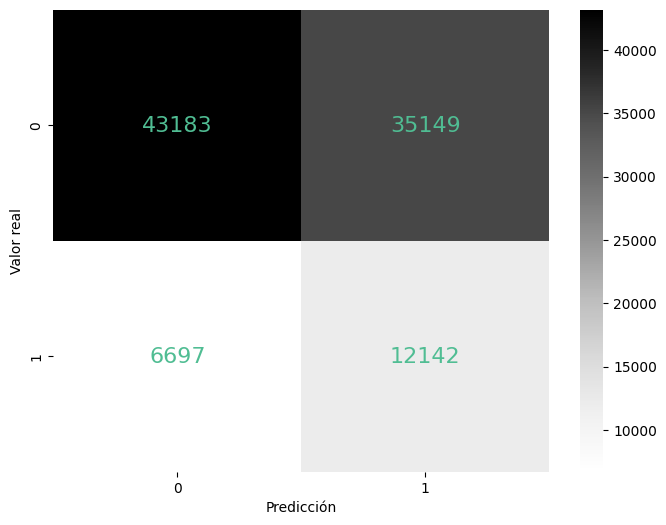

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import auth
from google.cloud import bigquery

# Autenticación
auth.authenticate_user()
# BigQuery
project_id = 'proyecto-no4-datalab-411515'
client = bigquery.Client(project=project_id)
# Query SQL
query = """
SELECT *
FROM proyecto-no4-datalab-411515.dataset_p4.master_clean
"""
# Ejecutar la consulta en BigQuery y obtener los resultados
query_job = client.query(query)
master_clean = query_job.to_dataframe()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score, recall_score, f1_score

# Variables categóricas que deseas codificar
categorical_columns = ['CRS_DEP_TIME_category', 'DAY_WEEK', 'DISTANCE_category',
                        'ORIGIN_Size', 'AIRLINE_CATEGORY', 'ORIGIN_Region',
                        'CRS_ELAPSED_TIME_Category']

# Variables independientes y dependiente
X = master_clean[categorical_columns]
y = master_clean['RETRASADOS']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el transformador para aplicar OneHotEncoder a las variables categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Crear el modelo de regresión logística con class_weight='balanced'
model = LogisticRegression(class_weight='balanced')

# Crear el pipeline que incluye el preprocesamiento y el modelo
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar métricas
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Encontrar el máximo y mínimo de la matriz
max_value = conf_matrix.max()
min_value = conf_matrix.min()

# Escala de colores
cmap = sns.color_palette("Greys", as_cmap=True)

# Visualizar la matriz de confusión como un mapa de calor con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap, annot_kws={"size": 16, "color": '#50BD93'}, vmax=max_value, vmin=min_value)
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.show()

# Regresión logística con OneHotEncoder - Modelo balanceado balanceado con SMOTE

Accuracy: 0.5706
Precision: 0.2568
Recall: 0.6418
F1 Score: 0.3669


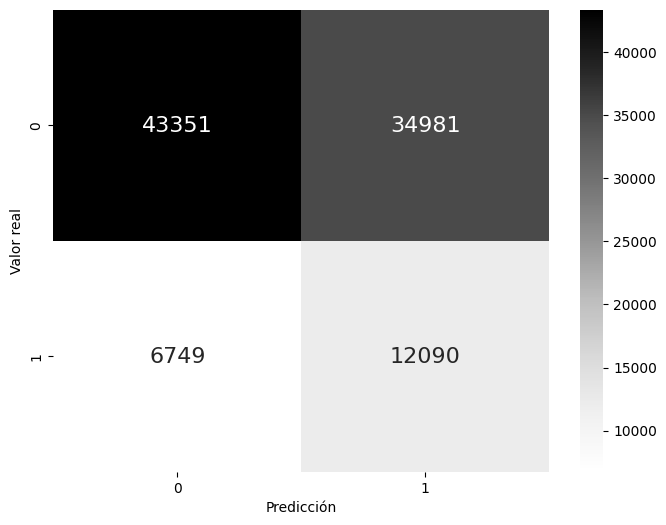

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import auth
from google.cloud import bigquery
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Autenticación
auth.authenticate_user()
# BigQuery
project_id = 'proyecto-no4-datalab-411515'
client = bigquery.Client(project=project_id)
# Query SQL
query = """
SELECT *
FROM proyecto-no4-datalab-411515.dataset_p4.master_clean
"""
# Ejecutar la consulta en BigQuery y obtener los resultados
query_job = client.query(query)
master_clean = query_job.to_dataframe()

# Variables categóricas que deseas codificar
categorical_columns = ['CRS_DEP_TIME_category', 'DAY_WEEK', 'DISTANCE_category',
                        'ORIGIN_Size', 'AIRLINE_CATEGORY', 'ORIGIN_Region',
                        'CRS_ELAPSED_TIME_Category']

# Variables independientes y dependiente
X = master_clean[categorical_columns]
y = master_clean['RETRASADOS']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Codificar variables categóricas con OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ], remainder='passthrough')

# Aplicar OneHotEncoder y SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_encoded = preprocessor.fit_transform(X_train)
X_train_smote, y_train_smote = smote.fit_resample(X_train_encoded, y_train)

# Crear el modelo de regresión logística
model = LogisticRegression()

# Entrenar el modelo con el conjunto de datos aumentado
model.fit(X_train_smote, y_train_smote)

# Aplicar OneHotEncoder al conjunto de prueba
X_test_encoded = preprocessor.transform(X_test)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test_encoded)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar métricas
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Visualizar la matriz de confusión como un mapa de calor con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greys', annot_kws={"size": 16})
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.show()



# Regresión logística con Undersampling (Submuestreo)

In [ ]:
!pip install --upgrade imblearn
!pip install sklearn --upgrade
!pip install scikit-learn==1.2.2
# Restart the kernel
!kill -9 -1

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


Accuracy: 0.5665
Precision: 0.2558
Recall: 0.6474
F1 Score: 0.3667


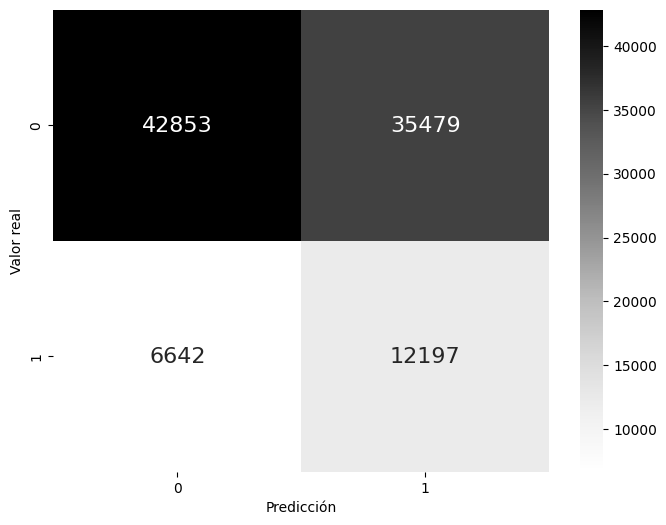

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import auth
from google.cloud import bigquery
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from imblearn.under_sampling import RandomUnderSampler

# Autenticación
auth.authenticate_user()
# BigQuery
project_id = 'proyecto-no4-datalab-411515'
client = bigquery.Client(project=project_id)
# Query SQL
query = """
SELECT *
FROM proyecto-no4-datalab-411515.dataset_p4.master_clean
"""
# Ejecutar la consulta en BigQuery y obtener los resultados
query_job = client.query(query)
master_clean = query_job.to_dataframe()

# Variables categóricas que deseas codificar
categorical_columns = ['CRS_DEP_TIME_category', 'DAY_WEEK', 'DISTANCE_category',
                        'ORIGIN_Size', 'AIRLINE_CATEGORY', 'ORIGIN_Region',
                        'CRS_ELAPSED_TIME_Category']

# Variables independientes y dependiente
X = master_clean[categorical_columns]
y = master_clean['RETRASADOS']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el transformador para aplicar OneHotEncoder a las variables categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Aplicar submuestreo aleatorio para manejar el desequilibrio de clases
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Crear el modelo de regresión logística
model = LogisticRegression()

# Crear el pipeline que incluye el preprocesamiento y el modelo
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

# Entrenar el modelo con los datos submuestreados
pipeline.fit(X_resampled, y_resampled)

# Hacer predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar métricas
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Visualizar la matriz de confusión como un mapa de calor con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greys', annot_kws={"size": 16})
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.show()


# Regresión logística con Oversampling (Sobremuestreo)


Accuracy: 0.5707
Precision: 0.2569
Recall: 0.6415
F1 Score: 0.3668


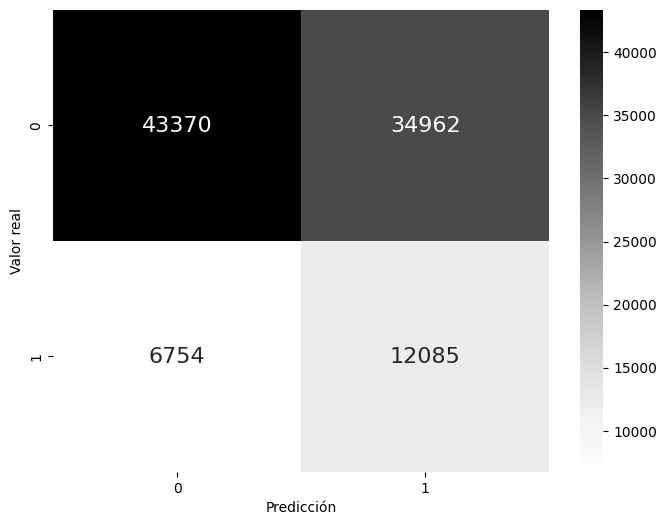

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import auth
from google.cloud import bigquery
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler

# Autenticación
auth.authenticate_user()
# BigQuery
project_id = 'proyecto-no4-datalab-411515'
client = bigquery.Client(project=project_id)
# Query SQL
query = """
SELECT *
FROM proyecto-no4-datalab-411515.dataset_p4.master_clean
"""
# Ejecutar la consulta en BigQuery y obtener los resultados
query_job = client.query(query)
master_clean = query_job.to_dataframe()

# Variables categóricas que deseas codificar
categorical_columns = ['CRS_DEP_TIME_category', 'DAY_WEEK', 'DISTANCE_category',
                        'ORIGIN_Size', 'AIRLINE_CATEGORY', 'ORIGIN_Region',
                        'CRS_ELAPSED_TIME_Category']

# Variables independientes y dependiente
X = master_clean[categorical_columns]
y = master_clean['RETRASADOS']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el transformador para aplicar OneHotEncoder a las variables categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Aplicar sobresampling aleatorio para manejar el desequilibrio de clases
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Crear el modelo de regresión logística
model = LogisticRegression()

# Crear el pipeline que incluye el preprocesamiento y el modelo
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

# Entrenar el modelo con los datos sobremuestreados
pipeline.fit(X_resampled, y_resampled)

# Hacer predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar métricas
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Visualizar la matriz de confusión como un mapa de calor con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greys', annot_kws={"size": 16})
plt.xlabel('Predicción')
plt.ylabel('Valor real')

plt.show()


# Modelo Ramdom forest - TargetEncoder

Instalar biblioteca de category_encoders para poder imputar con Target Encoder

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.3 MB/s eta 0:00:00


Accuracy: 0.8045
Precision: 0.3740
Recall: 0.0127
F1 Score: 0.0245


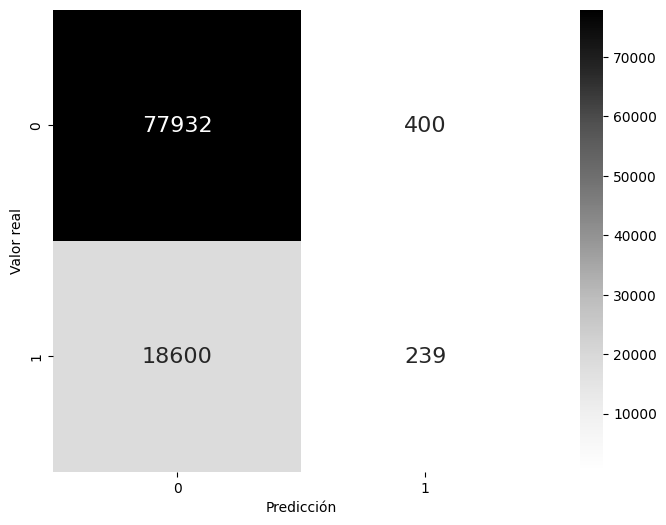

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import auth
from google.cloud import bigquery
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder

# Autenticación
auth.authenticate_user()
# BigQuery
project_id = 'proyecto-no4-datalab-411515'
client = bigquery.Client(project=project_id)
# Query SQL
query = """
SELECT *
FROM proyecto-no4-datalab-411515.dataset_p4.master_clean
"""
# Ejecutar la consulta en BigQuery y obtener los resultados
query_job = client.query(query)
master_clean = query_job.to_dataframe()

# Variables categóricas que deseas codificar
categorical_columns = ['CRS_DEP_TIME_category', 'DAY_WEEK', 'DISTANCE_category',
                        'ORIGIN_Size', 'AIRLINE_CATEGORY', 'ORIGIN_Region',
                        'CRS_ELAPSED_TIME_Category']

# Variables independientes y dependiente
X = master_clean[categorical_columns]
y = master_clean['RETRASADOS']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo Random Forest
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Aplicar Target Encoding a las variables categóricas
target_encoder = TargetEncoder(cols=categorical_columns)
X_train_encoded = target_encoder.fit_transform(X_train, y_train)
X_test_encoded = target_encoder.transform(X_test)

# Entrenar el modelo Random Forest
model_rf.fit(X_train_encoded, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_rf = model_rf.predict(X_test_encoded)

# Evaluar el rendimiento del modelo Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Mostrar métricas del modelo Random Forest
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")


# Visualizar la matriz de confusión del modelo Random Forest como un mapa de calor con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greys', annot_kws={"size": 16})
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.show()



# Modelo de Random Forest - Frequency Encoding

Accuracy: 0.8044
Precision: 0.3666
Recall: 0.0125
F1 Score: 0.0241


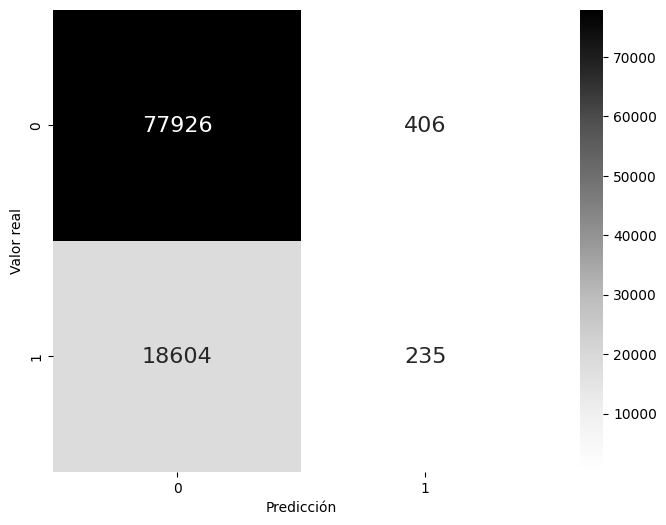

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import auth
from google.cloud import bigquery
from sklearn.model_selection import train_test_split

# Autenticación
auth.authenticate_user()
# BigQuery
project_id = 'proyecto-no4-datalab-411515'
client = bigquery.Client(project=project_id)
# Query SQL
query = """
SELECT *
FROM proyecto-no4-datalab-411515.dataset_p4.master_clean
"""
# Ejecutar la consulta en BigQuery y obtener los resultados
query_job = client.query(query)
master_clean = query_job.to_dataframe()

# Variables categóricas que deseas codificar
categorical_columns = ['CRS_DEP_TIME_category', 'DAY_WEEK', 'DISTANCE_category',
                        'ORIGIN_Size', 'AIRLINE_CATEGORY', 'ORIGIN_Region',
                        'CRS_ELAPSED_TIME_Category']

# Variables independientes y dependiente
X = master_clean[categorical_columns]
y = master_clean['RETRASADOS']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo Random Forest
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Aplicar Frequency Encoding a las variables categóricas
for column in categorical_columns:
    frequency_encoding = X_train[column].value_counts(normalize=True)
    X_train[column] = X_train[column].map(frequency_encoding)
    X_test[column] = X_test[column].map(frequency_encoding)

# Entrenar el modelo Random Forest
model_rf.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_rf = model_rf.predict(X_test)

# Evaluar el rendimiento del modelo Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Mostrar métricas del modelo Random Forest
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")


# Visualizar la matriz de confusión del modelo Random Forest como un mapa de calor con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greys', annot_kws={"size": 16})
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.show()


# Modelo de arbol - Sin balancear


Accuracy: 0.8047
Precision: 0.3745
Recall: 0.0108
F1 Score: 0.0209


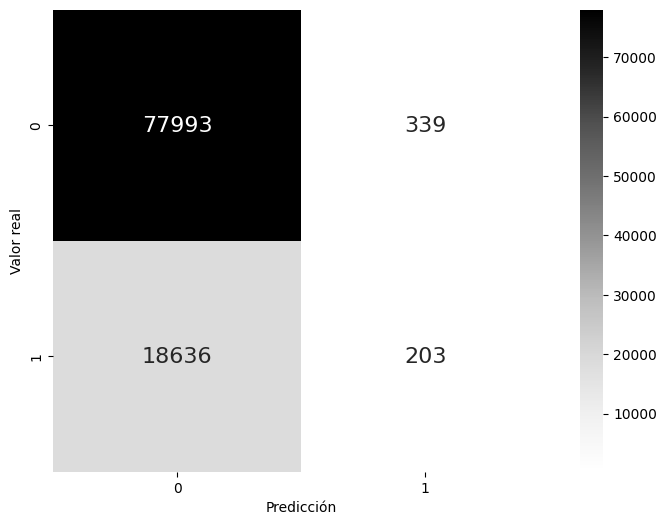

In [ ]:
from google.cloud import bigquery
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Autenticación e inicialización del cliente BigQuery
project_id = 'proyecto-no4-datalab-411515'
client = bigquery.Client(project=project_id)

# Query SQL
query = """
SELECT CRS_DEP_TIME_category, DAY_WEEK, DISTANCE_category,
       ORIGIN_Size, AIRLINE_CATEGORY, ORIGIN_Region,
       CRS_ELAPSED_TIME_Category, RETRASADOS
FROM proyecto-no4-datalab-411515.dataset_p4.master_clean
"""

# Ejecutar la consulta en BigQuery y obtener los resultados
datos = client.query(query).to_dataframe()

# Dividir los datos en características (X) y la variable objetivo (y)
X = datos.drop('RETRASADOS', axis=1)  # Eliminamos la columna de 'RETRASADOS' ya que es nuestra variable objetivo
y = datos['RETRASADOS']  # La variable objetivo es si el vuelo se retrasó o no

# Convertir variables categóricas en variables ficticias utilizando One-Hot Encoding
X = pd.get_dummies(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo de árbol de decisión
modelo_arbol = DecisionTreeClassifier()
modelo_arbol.fit(X_entrenamiento, y_entrenamiento)

# Hacer predicciones en el conjunto de prueba
predicciones = modelo_arbol.predict(X_prueba)
# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_prueba, predicciones)

# Calcular métricas
accuracy = accuracy_score(y_prueba, predicciones)
precision = precision_score(y_prueba, predicciones)
recall = recall_score(y_prueba, predicciones)
f1 = f1_score(y_prueba, predicciones)

# Mostrar métricas
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Visualizar la matriz de confusión como un mapa de calor con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greys', annot_kws={"size": 16})
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.show()




# Modelo de arbol - Balanceado con class_weight. **Modelo con mejor comportamiento**

Accuracy: 0.5915
Precision: 0.2637
Recall: 0.6180
F1 Score: 0.3697


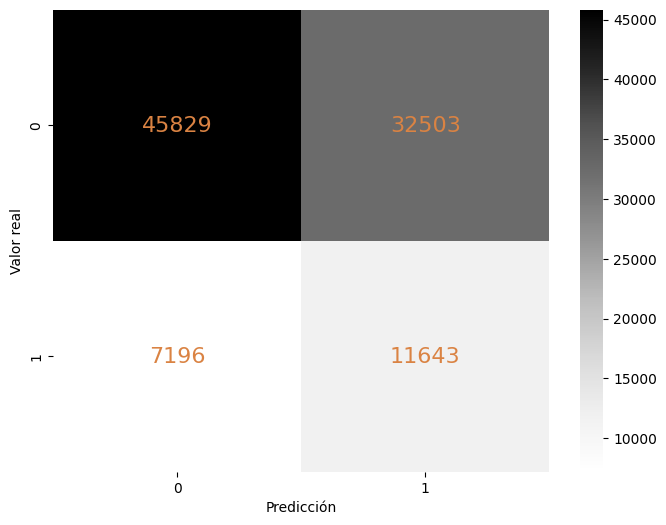

In [ ]:
from google.cloud import bigquery
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd  # Asegúrate de importar pandas si no lo has hecho antes

# Autenticación e inicialización del cliente BigQuery
project_id = 'proyecto-no4-datalab-411515'
client = bigquery.Client(project=project_id)

# Query SQL
query = """
SELECT CRS_DEP_TIME_category, DAY_WEEK, DISTANCE_category,
       ORIGIN_Size, AIRLINE_CATEGORY, ORIGIN_Region,
       CRS_ELAPSED_TIME_Category, RETRASADOS
FROM proyecto-no4-datalab-411515.dataset_p4.master_clean
"""

# Ejecutar la consulta en BigQuery y obtener los resultados
datos = client.query(query).to_dataframe()

# Dividir los datos en características (X) y la variable objetivo (y)
X = datos.drop('RETRASADOS', axis=1)  # Eliminamos la columna de 'RETRASADOS' ya que es nuestra variable objetivo
y = datos['RETRASADOS']  # La variable objetivo es si el vuelo se retrasó o no

# Convertir variables categóricas en variables ficticias utilizando One-Hot Encoding
X = pd.get_dummies(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo de árbol de decisión con balanceo de clases
modelo_arbol = DecisionTreeClassifier(class_weight='balanced')
modelo_arbol.fit(X_entrenamiento, y_entrenamiento)

# Hacer predicciones en el conjunto de prueba
predicciones = modelo_arbol.predict(X_prueba)

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_prueba, predicciones)

# Calcular métricas
accuracy = accuracy_score(y_prueba, predicciones)
precision = precision_score(y_prueba, predicciones)
recall = recall_score(y_prueba, predicciones)
f1 = f1_score(y_prueba, predicciones)

# Mostrar métricas
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Encontrar el máximo y mínimo de la matriz
max_value = conf_matrix.max()
min_value = conf_matrix.min()

# Escala de colores
cmap = sns.color_palette("Greys", as_cmap=True)

# Visualizar la matriz de confusión como un mapa de calor con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap, annot_kws={"size": 16, "color": '#DA8343'}, vmax=max_value, vmin=min_value)
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.show()

# Modelo de arbol - Balanceado con SMOTE

Accuracy: 0.6061
Precision: 0.2663
Recall: 0.5879
F1 Score: 0.3665


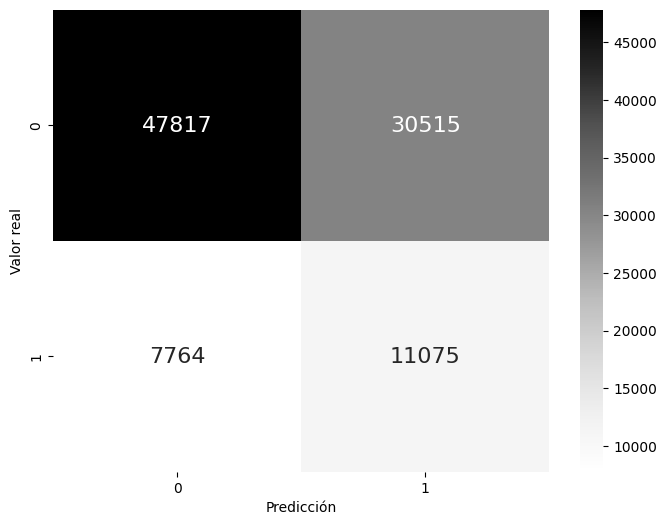

In [ ]:
from google.cloud import bigquery
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Autenticación e inicialización del cliente BigQuery
project_id = 'proyecto-no4-datalab-411515'
client = bigquery.Client(project=project_id)

# Query SQL
query = """
SELECT CRS_DEP_TIME_category, DAY_WEEK, DISTANCE_category,
       ORIGIN_Size, AIRLINE_CATEGORY, ORIGIN_Region,
       CRS_ELAPSED_TIME_Category, RETRASADOS
FROM proyecto-no4-datalab-411515.dataset_p4.master_clean
"""

# Ejecutar la consulta en BigQuery y obtener los resultados
datos = client.query(query).to_dataframe()

# Dividir los datos en características (X) y la variable objetivo (y)
X = datos.drop('RETRASADOS', axis=1)  # Eliminamos la columna de 'RETRASADOS' ya que es nuestra variable objetivo
y = datos['RETRASADOS']  # La variable objetivo es si el vuelo se retrasó o no

# Convertir variables categóricas en variables ficticias utilizando One-Hot Encoding
X = pd.get_dummies(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_entrenamiento_smote, y_entrenamiento_smote = smote.fit_resample(X_entrenamiento, y_entrenamiento)

# Inicializar y entrenar el modelo de árbol de decisión
modelo_arbol = DecisionTreeClassifier()
modelo_arbol.fit(X_entrenamiento_smote, y_entrenamiento_smote)

# Hacer predicciones en el conjunto de prueba
predicciones = modelo_arbol.predict(X_prueba)
# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_prueba, predicciones)

# Calcular métricas
accuracy = accuracy_score(y_prueba, predicciones)
precision = precision_score(y_prueba, predicciones)
recall = recall_score(y_prueba, predicciones)
f1 = f1_score(y_prueba, predicciones)

# Mostrar métricas
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Visualizar la matriz de confusión como un mapa de calor con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greys', annot_kws={"size": 16})
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.show()
